# **Importing libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn import utils

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.preprocessing.sequence import TimeseriesGenerator


import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit


# **Loading the dataset**

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **Pre-processing**

In [53]:
# memperbaiki tipe data waktu
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [54]:
# mengganti spasi(" ") menjadi underscore ("_")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## **Korelasi antar variable (numerikal)**

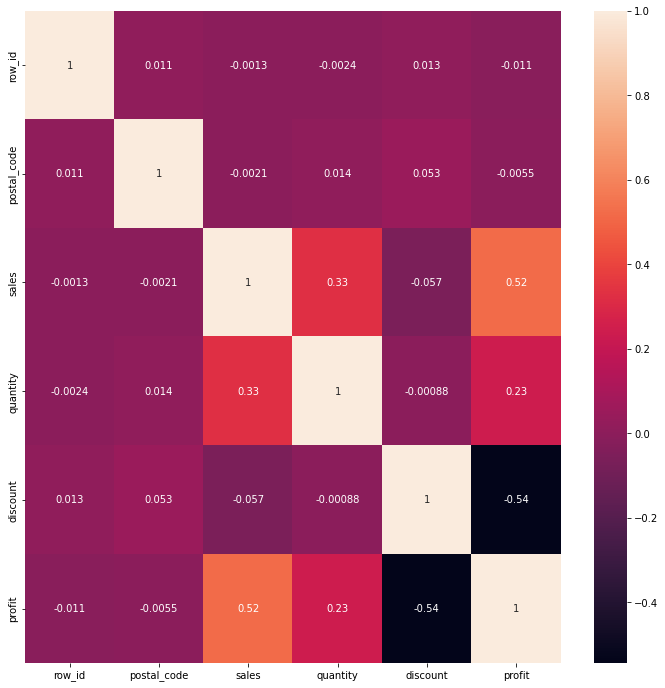

In [55]:
#pearson (tidak sensitif outlier)
#spearman (sensitif outlier)

correlation = df.corr(method='spearman') 

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True) #annot(annotasi) agar tahu valuenya berapa
plt.show()

Nilai korelasi yang melebih dari 0,5 yaitu sales dan profit.

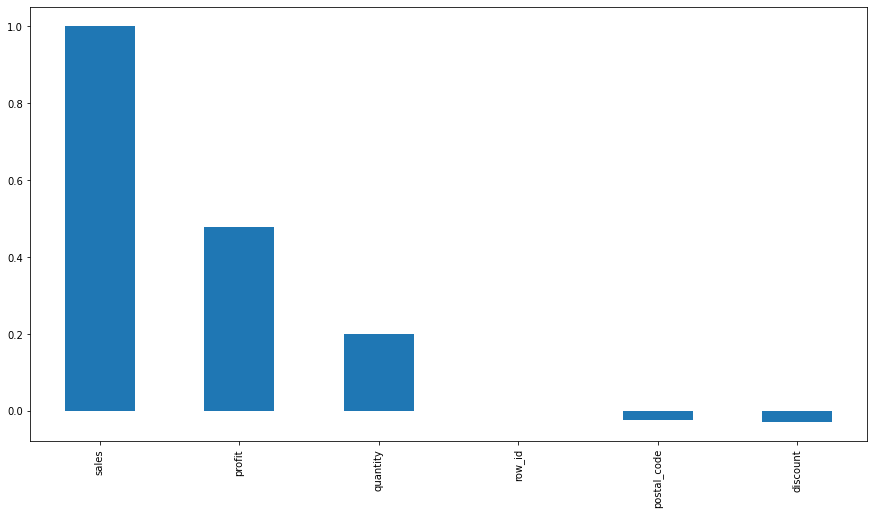

In [56]:
plt.figure(figsize=(15,8))
df.corr()['sales'].sort_values(ascending = False).plot(kind='bar') 

Dapat kita lihat bahwa profit memiliki korelasi dengan sales sebesar 0,52.

## **Feature Engineering**

In [57]:
sales_data=df[['order_date','sales']]
sales_data=sales_data.sort_values('order_date')
sales_data.head()

,order_date,sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


Karena akan memprediksi penjualan maka kita gunakan data order date dan sales.

In [58]:
# lihat penjualan perhari

sales_data=sales_data.groupby(['order_date'])[['sales']].sum().reset_index()
sales_data

,order_date,sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


disini kita akan mengabungkan data penjualan perhari sehingga dapat mempermudah dalam melakukan prediksi. 

In [59]:
# buatlah tanggal menjadi index
sales_data=sales_data.set_index('order_date')
sales_data.head(20)

,sales
order_date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


Selanjutnya kita mengabungkan data penjualan perbulan.

In [60]:
# Down sample to monthly frequency

sales_data=sales_data.resample('MS').mean()
sales_data

,sales
order_date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


penjualan rata-rata bulanan

In [61]:
sales_data['Sale_LastMonth']=sales_data['sales'].shift(+1)
sales_data['Sale_2Monthsback']=sales_data['sales'].shift(+2)
sales_data['Sale_3Monthsback']=sales_data['sales'].shift(+3)
sales_data

,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
order_date,,,,
2014-01-01,647.131591,NaN,NaN,NaN
2014-02-01,225.994600,647.131591,NaN,NaN
2014-03-01,2320.458708,225.994600,647.131591,NaN
2014-04-01,1178.972708,2320.458708,225.994600,647.131591
2014-05-01,844.581679,1178.972708,2320.458708,225.994600
2014-06-01,1383.805104,844.581679,1178.972708,2320.458708
2014-07-01,1414.433042,1383.805104,844.581679,1178.972708
2014-08-01,1162.894521,1414.433042,1383.805104,844.581679
2014-09-01,2920.619671,1162.894521,1414.433042,1383.805104


Pada kali ini, dari data sales diatas data akan dibagi menjadi data satu bulan terakhir, dua bulan terakhir dan tiga bulan terakhir.

In [62]:
sales_data['Sale_LastMonth'].fillna(0, inplace = True)
sales_data['Sale_2Monthsback'].fillna(0, inplace = True)
sales_data['Sale_3Monthsback'].fillna(0, inplace = True)
sales_data

,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
order_date,,,,
2014-01-01,647.131591,0.000000,0.000000,0.000000
2014-02-01,225.994600,647.131591,0.000000,0.000000
2014-03-01,2320.458708,225.994600,647.131591,0.000000
2014-04-01,1178.972708,2320.458708,225.994600,647.131591
2014-05-01,844.581679,1178.972708,2320.458708,225.994600
2014-06-01,1383.805104,844.581679,1178.972708,2320.458708
2014-07-01,1414.433042,1383.805104,844.581679,1178.972708
2014-08-01,1162.894521,1414.433042,1383.805104,844.581679
2014-09-01,2920.619671,1162.894521,1414.433042,1383.805104


Karena ada data nan pada awal bulan maka dilakukan pengisiian data dengan nilai 0.

# **Regressi**

## **Split Data**

In [63]:
import numpy as np
x1,x2,x3,y=sales_data['Sale_LastMonth'],sales_data['Sale_2Monthsback'],sales_data['Sale_3Monthsback'],sales_data['sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[   0.            0.            0.        ]
 [ 647.13159091    0.            0.        ]
 [ 225.9946      647.13159091    0.        ]
 [2320.45870833  225.9946      647.13159091]
 [1178.97270833 2320.45870833  225.9946    ]
 [ 844.58167857 1178.97270833 2320.45870833]
 [1383.805104    844.58167857 1178.97270833]
 [1414.43304167 1383.805104    844.58167857]
 [1162.89452083 1414.43304167 1383.805104  ]
 [2920.61967143 1162.89452083 1414.43304167]
 [1084.59975862 2920.61967143 1162.89452083]
 [2711.33505862 1084.59975862 2920.61967143]
 [2483.77216071 2711.33505862 1084.59975862]
 [1009.67086667 2483.77216071 2711.33505862]
 [ 703.02417647 1009.67086667 2483.77216071]
 [1489.47123077  703.02417647 1009.67086667]
 [1367.80834    1489.47123077  703.02417647]
 [1115.98838889 1367.80834    1489.47123077]
 [1127.14963636 1115.98838889 1367.80834   ]
 [1198.55520833 1127.14963636 1115.98838889]
 [1677.19691818 1198.55520833 1127.14963636]
 [2583.83672    1677.19691818 1198.55520833]
 [1207.881

In [64]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

## **Linear Regression**

In [65]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

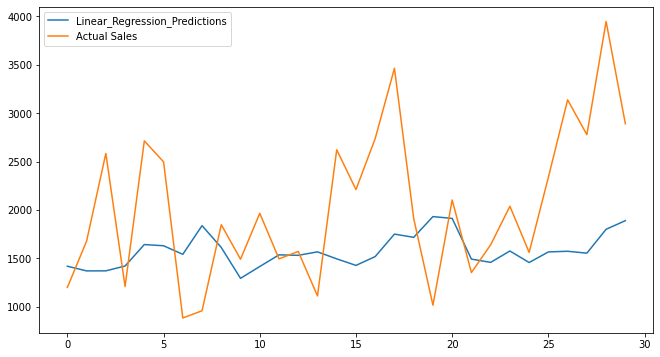

In [66]:
linear_regression=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(linear_regression,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [67]:
hasil = pd.DataFrame({
    
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': linear_regression.flatten()}).head(20)

hasil

,Actual Prices,Predicted Prices
0,1198.555208,1418.104349
1,1677.196918,1369.678213
2,2583.836720,1370.292750
3,1207.881673,1420.004748
4,2713.305839,1642.121505
5,2497.317373,1629.678327
6,882.975762,1540.952271
7,957.450625,1837.394248
8,1846.995536,1611.555001
9,1490.386115,1292.765736


## **Random Forest Regressor**

In [68]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

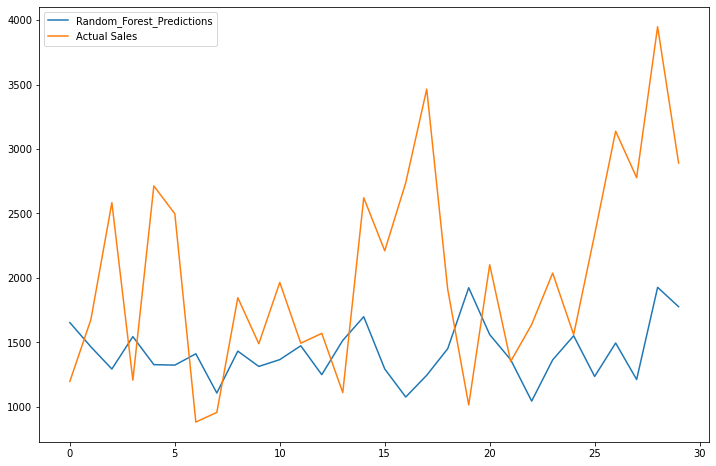

In [69]:
random_forest=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(random_forest,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [70]:
hasil = pd.DataFrame({
        'Actual Prices': np.array(y_test).flatten(),
        'Predicted Prices': random_forest.flatten()}).head(20)

hasil

,Actual Prices,Predicted Prices
0,1198.555208,1653.837084
1,1677.196918,1466.323551
2,2583.836720,1294.129371
3,1207.881673,1545.226207
4,2713.305839,1328.007875
5,2497.317373,1324.212145
6,882.975762,1412.131533
7,957.450625,1108.030140
8,1846.995536,1432.621993
9,1490.386115,1314.024119


## **MSE dan RMSE**

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_rf= mean_squared_error(random_forest,y_test)
mse_lr= mean_squared_error(linear_regression,y_test)
rmse_rf=sqrt(mean_squared_error(random_forest,y_test))
rmse_lr=sqrt(mean_squared_error(linear_regression,y_test))

In [72]:
print('Mean Squared Error for Random Forest Model is:',mse_rf)
print('Root Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',mse_lr)
print('Root Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 988319.7390376867
Root Mean Squared Error for Random Forest Model is: 994.1427156287405
Mean Squared Error for Linear Regression Model is: 768177.197916644
Root Mean Squared Error for Linear Regression Model is: 876.4571854441289


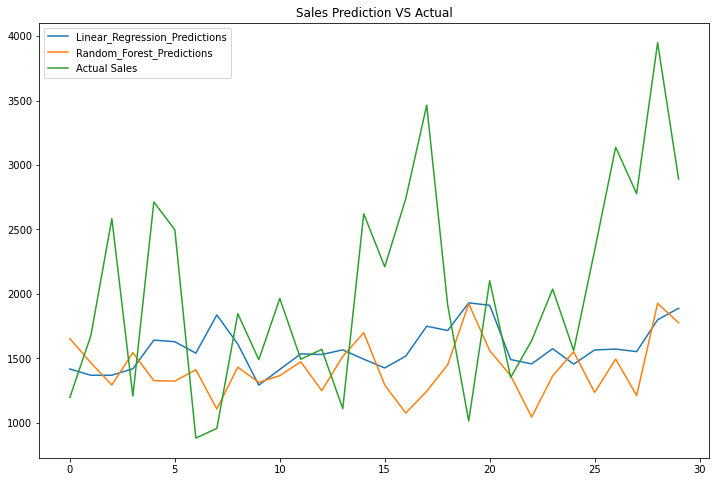

In [75]:
plt.plot(linear_regression,label='Linear_Regression_Predictions')
plt.plot(random_forest,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.title("Sales Prediction VS Actual")
plt.legend(loc="upper left")
plt.show()